In [1]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.plots import corner
from mejiro.utils import util

# read configuration file
with open('roman_data_challenge_rung_1.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [2]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 1293 pickle(s) in /nfsdata1/bwedig/mejiro/roman_data_challenge_rung_1_dev/03


In [3]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

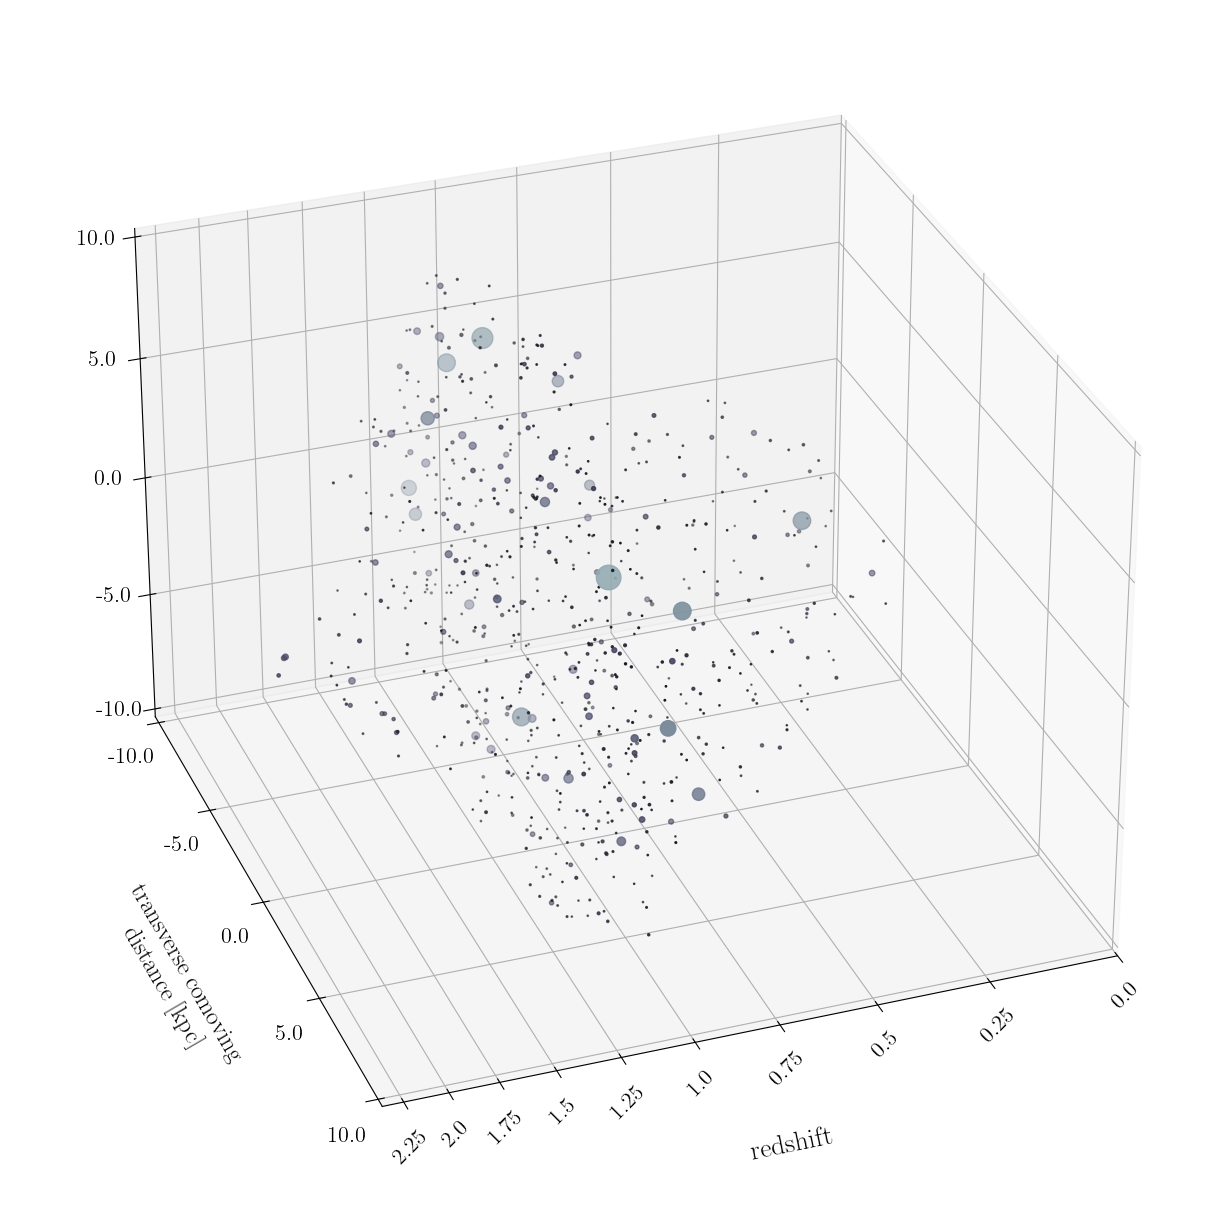

In [4]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

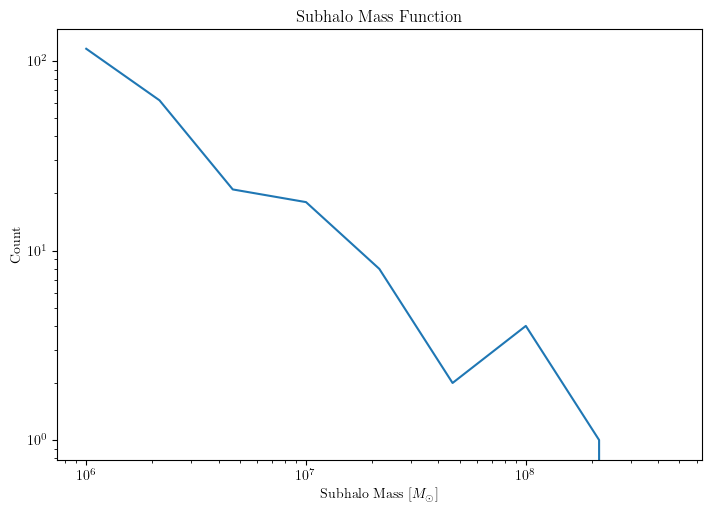

In [5]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.title('Subhalo Mass Function')
plt.xlabel('Subhalo Mass [$M_\odot$]')
plt.ylabel('Count')
plt.show()

In [6]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 4.13e+08 Msun

{'_args': {},
 '_c': 5.192186732966418,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7f728fbe1030>,
 '_kwargs_lenstronomy': [{'Rs': 0.0925883262,
                          'alpha_Rs': 0.001905906708948013,
                          'center_x': 0.345,
                          'center_y': 0.3141,
                          'r_trunc': 0.08404221372651496}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f728fbe0d30>,
 '_mbound_galacticus_definition': 86237877.17427647,
 '_nfw_params': [70750911.91619408, 0.7781788294474501, 4.040449794132387],
 '_profile_args': (5.192186732966418, 0.7063465770282269),
 '_rescale_norm': 0.7954877479908414,
 '_rescaled_once': True,
 '_time_since_infall': 4.220893701462084,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationGalacticus object at 0x7f728fbe13c0>,
 '_z_infall': 4.724054135691244,
 '_zeval': 4.724054135691244,
 'fixed_position': False,
 'is_

# Review failed systems

In [7]:
lenses = util.unpickle_all(os.path.join(data_dir, 'sca*'), prefix="lens_")
print(f'Found {len(lenses)} lens(es) in {data_dir}')

Found 2695 lens(es) in /nfsdata1/bwedig/mejiro/roman_data_challenge_rung_1_dev/03


In [8]:
failed_lenses = util.unpickle_all(data_dir, prefix="failed_")
print(f'{len(failed_lenses)} failed out of {len(lenses)} systems, {len(failed_lenses) / len(lenses) * 100:.2f} percent')

109 failed out of 2695 systems, 4.04 percent


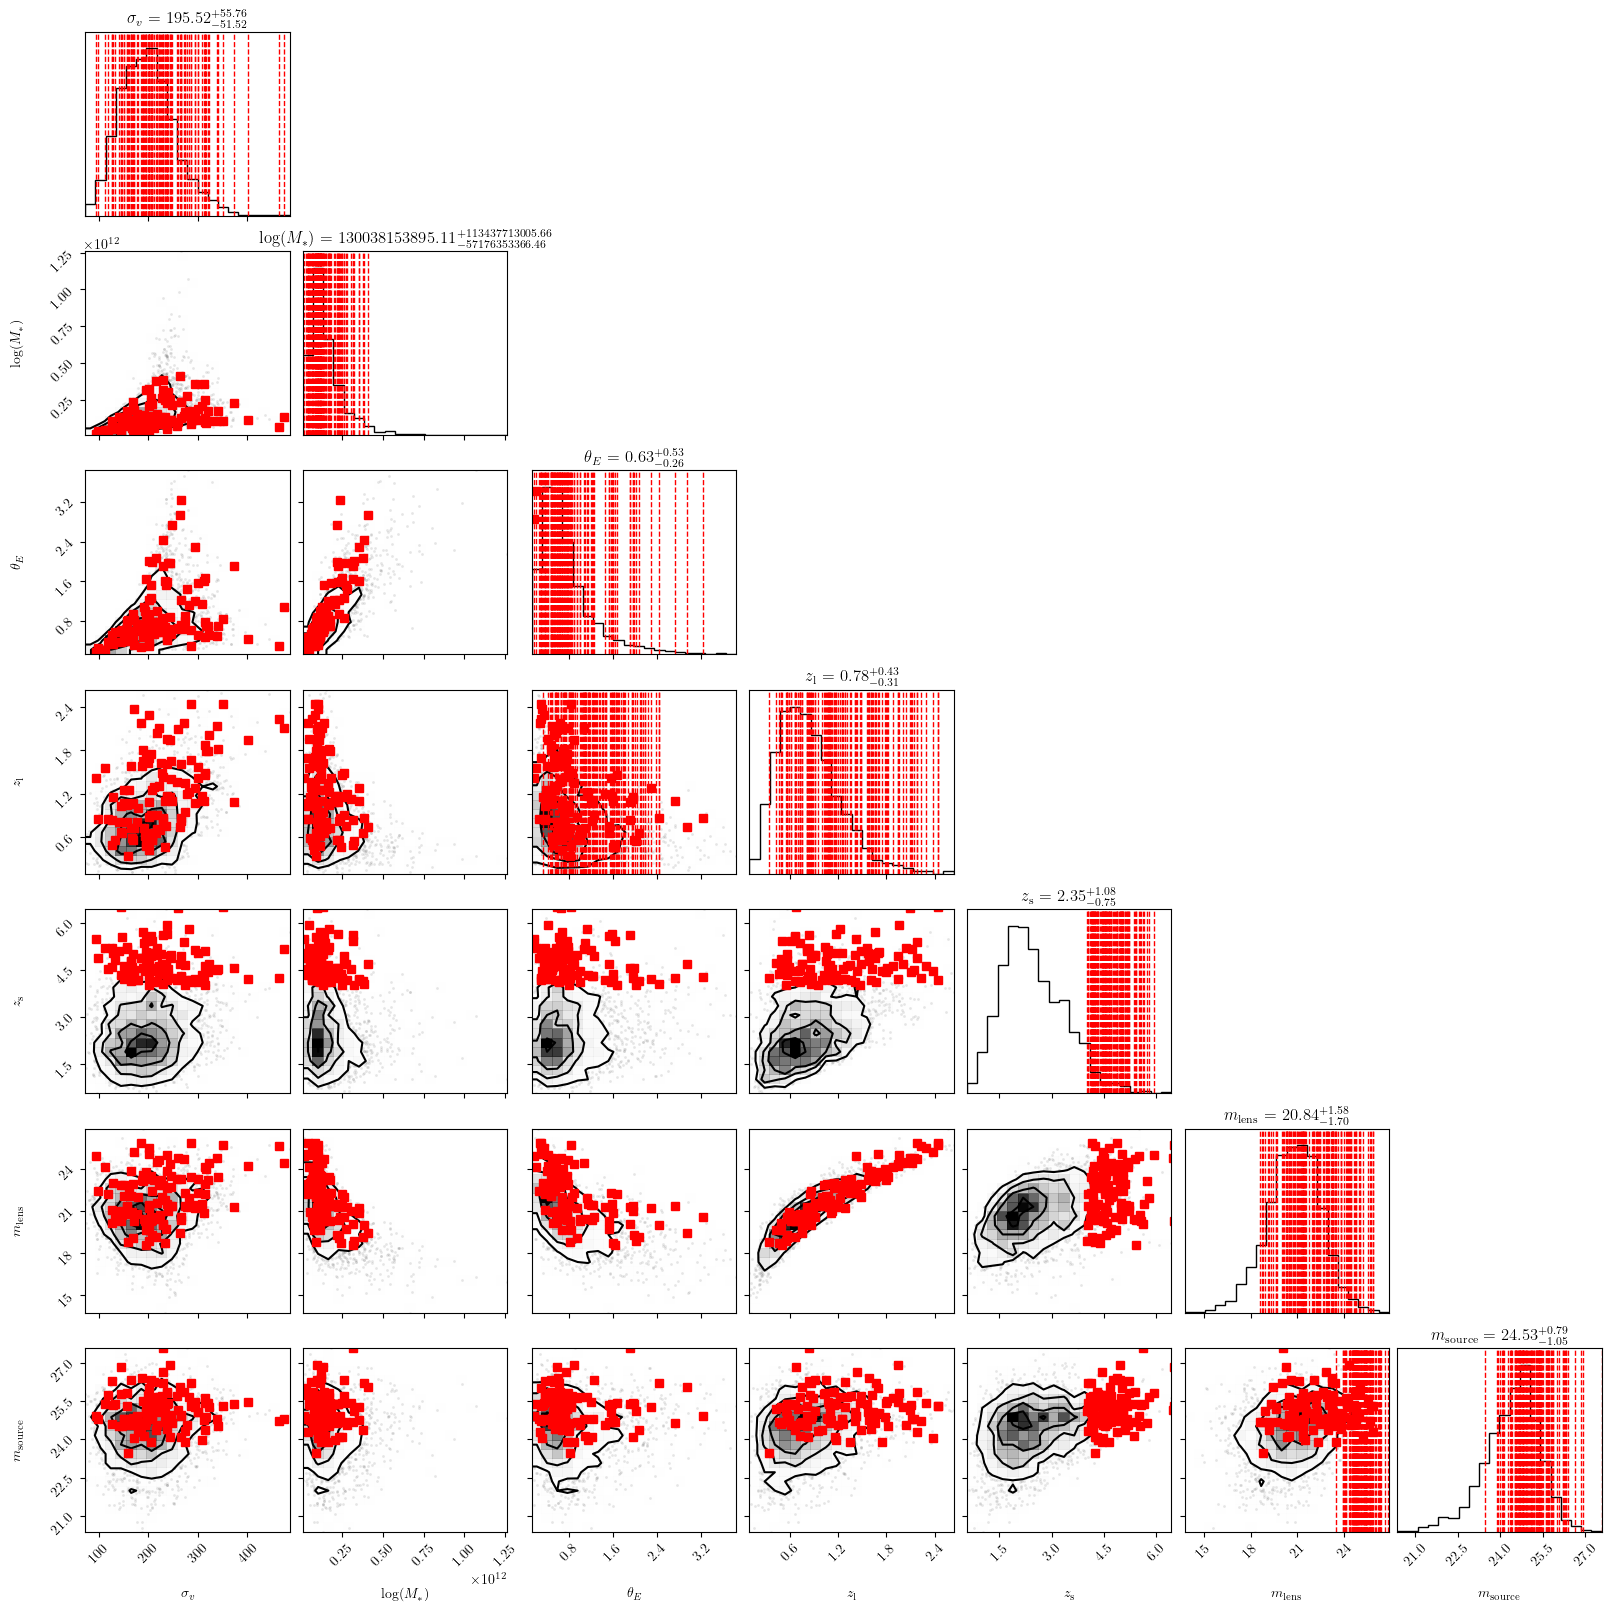

In [9]:
total_corner = corner.overview(lenses, 'F129', quantiles=None)
corner.overplot_points(total_corner, failed_lenses)